# Heart Disease Prediction using Machine Learning

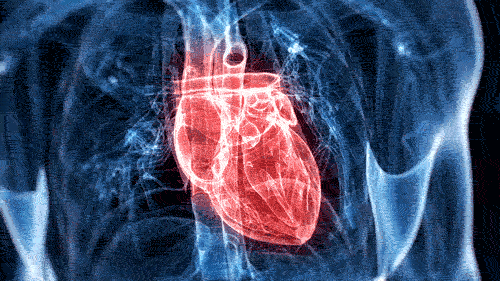

# Project Objective
Heart Disease Prediction using Machine Learning
Heart disease prevention is critical, and data-driven prediction systems can significantly aid in early diagnosis and treatment. Machine Learning offers accurate prediction capabilities, enhancing healthcare outcomes.
In this project, I analyzed a heart disease dataset with appropriate preprocessing. Multiple classification algorithms were implemented in Python using Scikit-learn and Keras to predict the presence of heart disease.

**Algorithms Used**:
- Logistic Regression
- Naive Bayes
- Support Vector Machine (Linear)
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- XGBoost
- Artificial Neural Network (1 Hidden Layer, Keras)

In [1]:
# Multiple Model Test: Best Model Save(Best score)



## step 1: import Important Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
print('All Modules Loaded Successfully!')

All Modules Loaded Successfully!


## step 2: Loading Data 

In [3]:
import pandas as pd
df = pd.read_csv("heart.csv")
print('done')

done


## Step 3: Understanding Data using EDA 

In [4]:
# step 3 .1 DAta head
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
# step 3.2 : data tail
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [6]:
# 3.3 data shape
df.shape

(303, 14)

In [7]:
# 3.4 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# 3.5 columns 
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

##### 3.6 Column Desc
- **age**:			``age``
- **sex**:			``1: male, 0: female``
- **cp**:			``chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic``
- **trestbps**:			``resting blood pressure``
- **chol**:			`` serum cholestoral in mg/dl``
- **fbs**:			``fasting blood sugar > 120 mg/dl``
- **restecg**:			``resting electrocardiographic results (values 0,1,2)``
- **thalach**:			 ``maximum heart rate achieved``
- **exang**:			``exercise induced angina``
- **oldpeak**:			``oldpeak = ST depression induced by exercise relative to rest``
- **slope**:			``the slope of the peak exercise ST segment``
- **ca**:			``number of major vessels (0-3) colored by flourosopy``
- **thal**:			``thal: 3 = normal; 6 = fixed defect; 7 = reversable defect``

##### 3.7 : Checking null values/ counts

In [9]:
df.isna().sum()
# no null value found
# in case of null:remove/replace/drop

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##### 3.8 : columns stats 

In [10]:
df.describe().round(2)

age     sex      cp  trestbps    chol     fbs  restecg  thalach  \
count  303.00  303.00  303.00    303.00  303.00  303.00   303.00   303.00   
mean    54.37    0.68    0.97    131.62  246.26    0.15     0.53   149.65   
std      9.08    0.47    1.03     17.54   51.83    0.36     0.53    22.91   
min     29.00    0.00    0.00     94.00  126.00    0.00     0.00    71.00   
25%     47.50    0.00    0.00    120.00  211.00    0.00     0.00   133.50   
50%     55.00    1.00    1.00    130.00  240.00    0.00     1.00   153.00   
75%     61.00    1.00    2.00    140.00  274.50    0.00     1.00   166.00   
max     77.00    1.00    3.00    200.00  564.00    1.00     2.00   202.00   

        exang  oldpeak   slope      ca    thal  target  
count  303.00   303.00  303.00  303.00  303.00  303.00  
mean     0.33     1.04    1.40    0.73    2.31    0.54  
std      0.47     1.16    0.62    1.02    0.61    0.50  
min      0.00     0.00    0.00    0.00    0.00    0.00  
25%      0.00     0.00    1.00    0.00    2.00    0.00  
50%      0.00     0.80    1.00    0.00    2.00    1.00  
75%      1.00     1.60    2.00    1.00    3.00    1.00  
max      1.00     6.20    2.00    4.00    3.00    1.00

##### 3.9: Each column univariate analysis


In [11]:
for i in df:
    print(f'column_{i}',df[i].unique())
    print('====================',end = '\n\n')

column_age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

column_sex [1 0]

column_cp [3 2 1 0]

column_trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]

column_chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 3

##### 3.10: Each numerical Features hist plot distribution

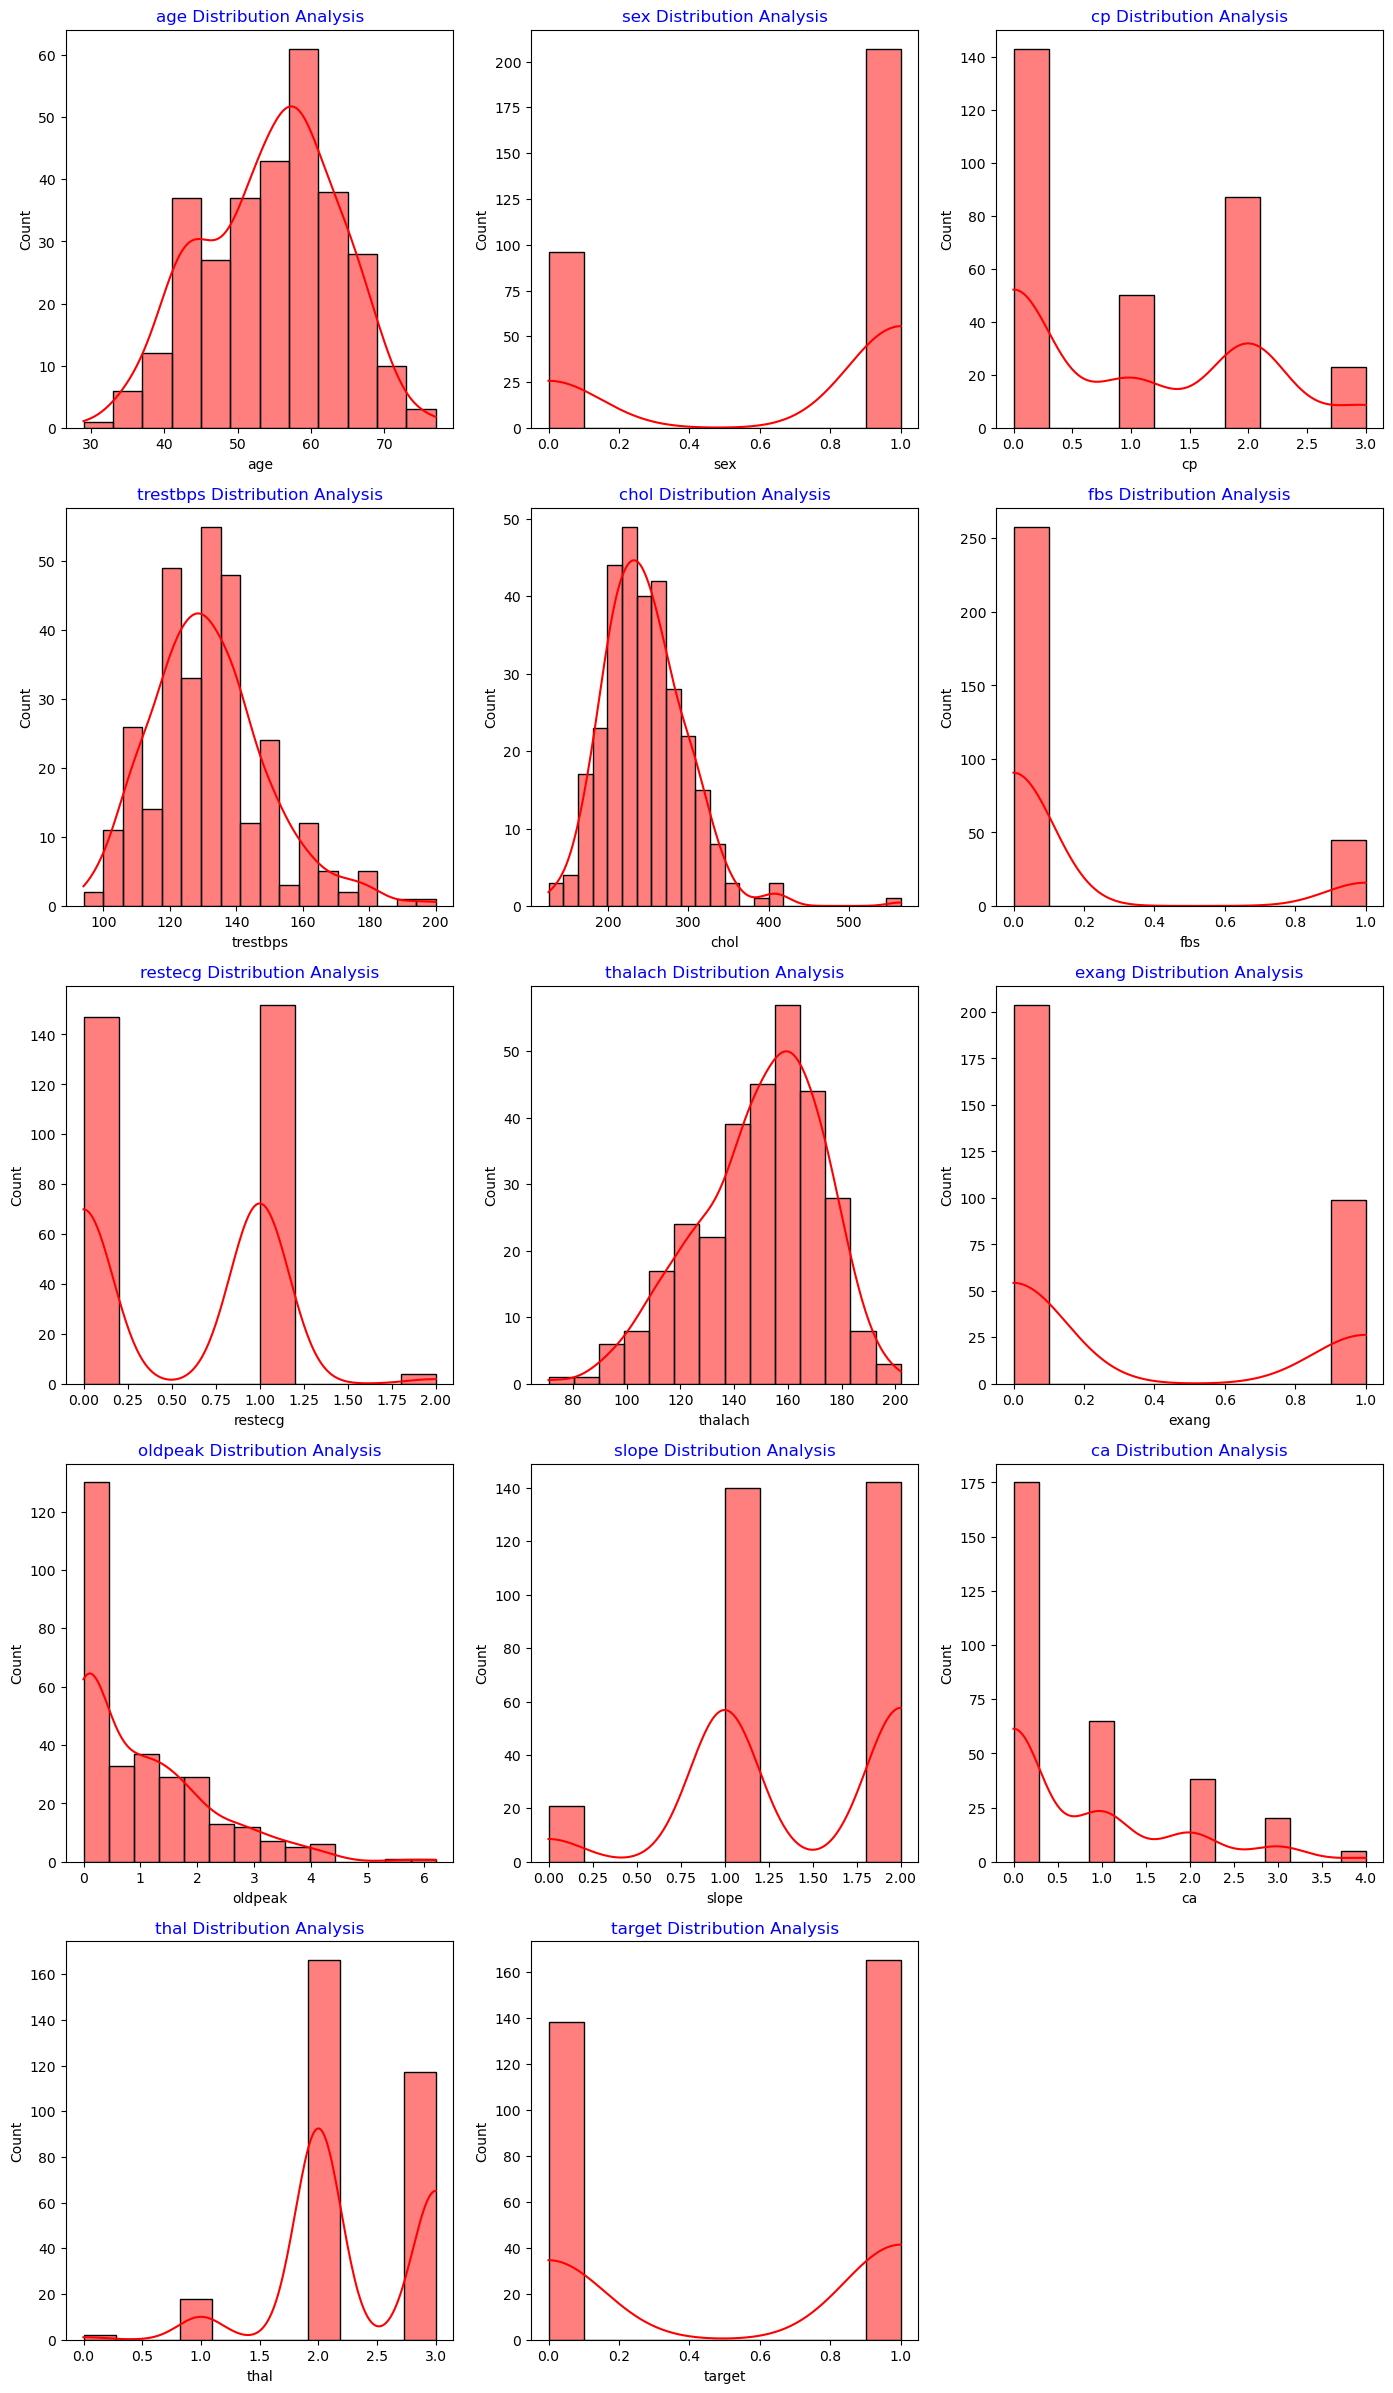

In [12]:
r = 5
c = 3
plt.figure(figsize=(17,30))
for i,j in enumerate(df):
    plt.subplot(r,c,i+1)
    plt.title(f'{j} Distribution Analysis',color = 'Blue')
    sns.histplot(df[j],kde = True,color = 'r')

plt.savefig('All Numerical Features Analysis.jpeg',dpi = 500)
plt.show()


In [13]:
# Target col not that much imbalance, we can proceed, if imbalance found we need to balance using sampling

###### 3.11 : Bivariate Analysis , to check Correlation of features vs target

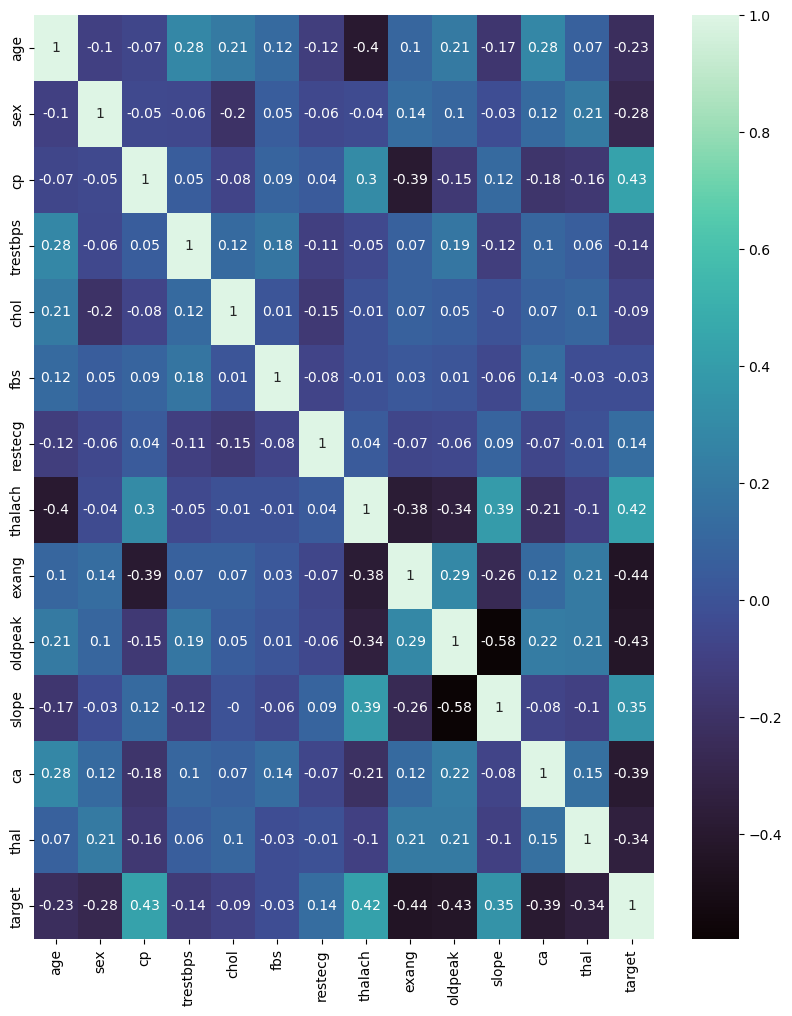

In [14]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr().round(2),cmap='mako',annot = True)
plt.show()

In [15]:
# "thalach" refers to the maximum heart rate achieved during exercise, specifically measured in beats per minute (bpm)

In [16]:
# "slope" usually refers to the ST/HR slope, which is a measurement derived from an exercise stress test used to assess the severity of coronary artery disease

In [17]:
# Fasting blood sugar (FBS) levels, when elevated, can indicate an increased risk of heart disease

##### 3.12 : target vs features

In [18]:
# 3.12: Target vs Features
df.corr()['target'].sort_values(ascending = False).reset_index()


index    target
0     target  1.000000
1         cp  0.433798
2    thalach  0.421741
3      slope  0.345877
4    restecg  0.137230
5        fbs -0.028046
6       chol -0.085239
7   trestbps -0.144931
8        age -0.225439
9        sex -0.280937
10      thal -0.344029
11        ca -0.391724
12   oldpeak -0.430696
13     exang -0.436757

In [19]:
df.columns[:-1]

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

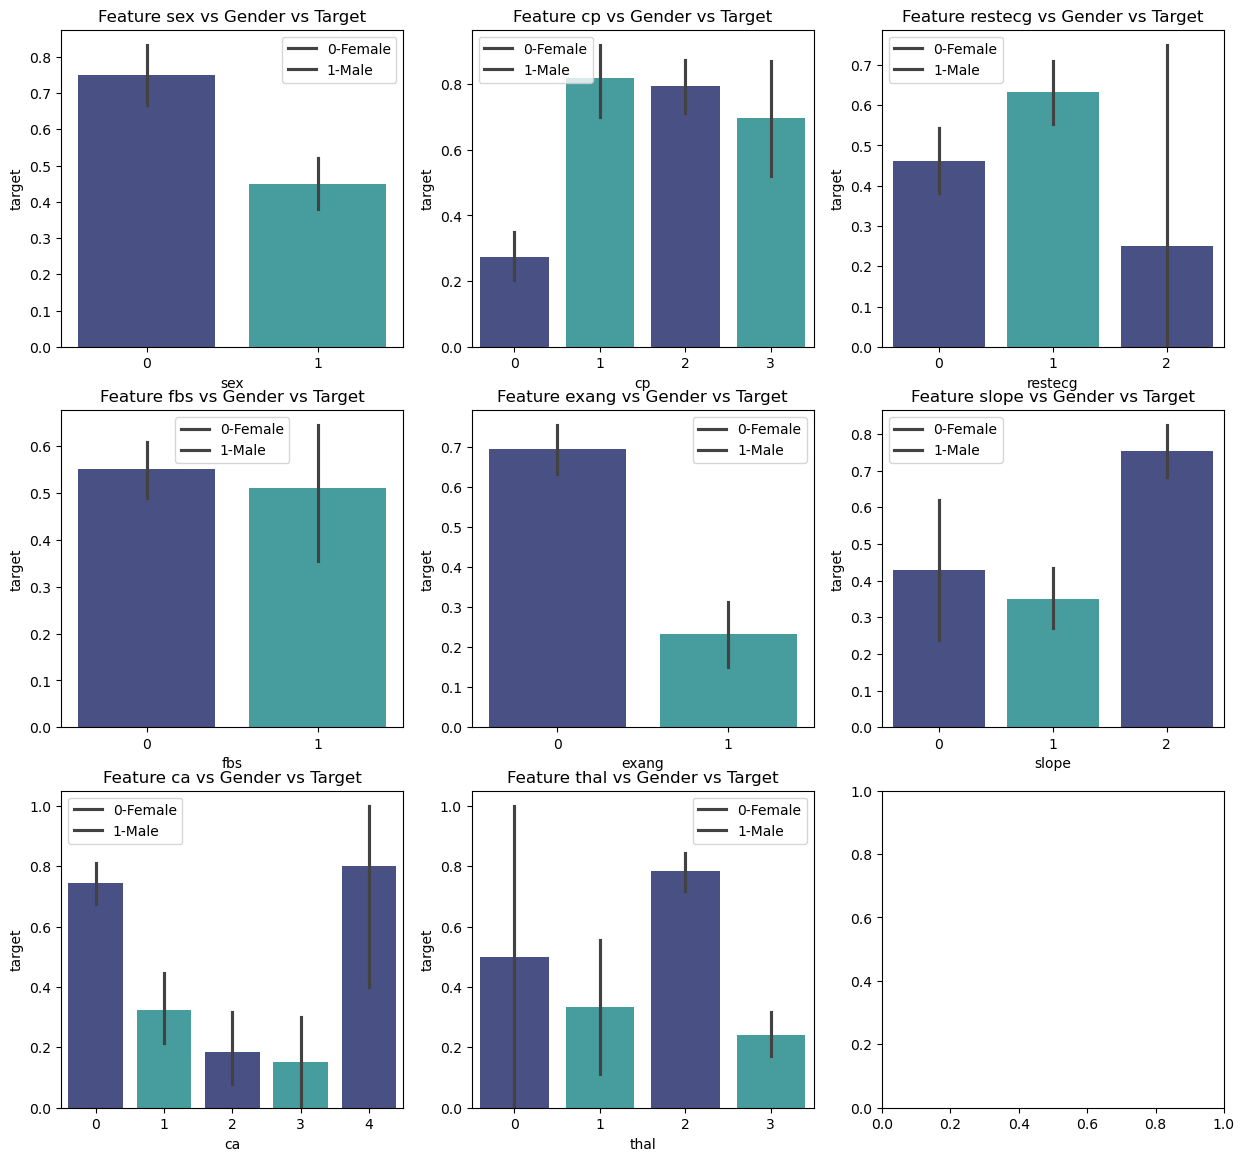

In [20]:
r = 3
c = 3
x_col = ['sex','cp','restecg','fbs','exang','slope', 'ca', 'thal']
plt.figure(figsize=(15,14))
for i in range(r*c):
    try:
        plt.subplot(r,c,i+1)
        plt.title(f'Feature {x_col[i]} vs Gender vs Target')
        sns.barplot(data = df, x = x_col[i], y = 'target', palette=sns.color_palette('mako',2))
        plt.legend(['0-Female','1-Male'])
    except:
        ...


plt.show()


###### 3.13 : fetures vs target pairplot

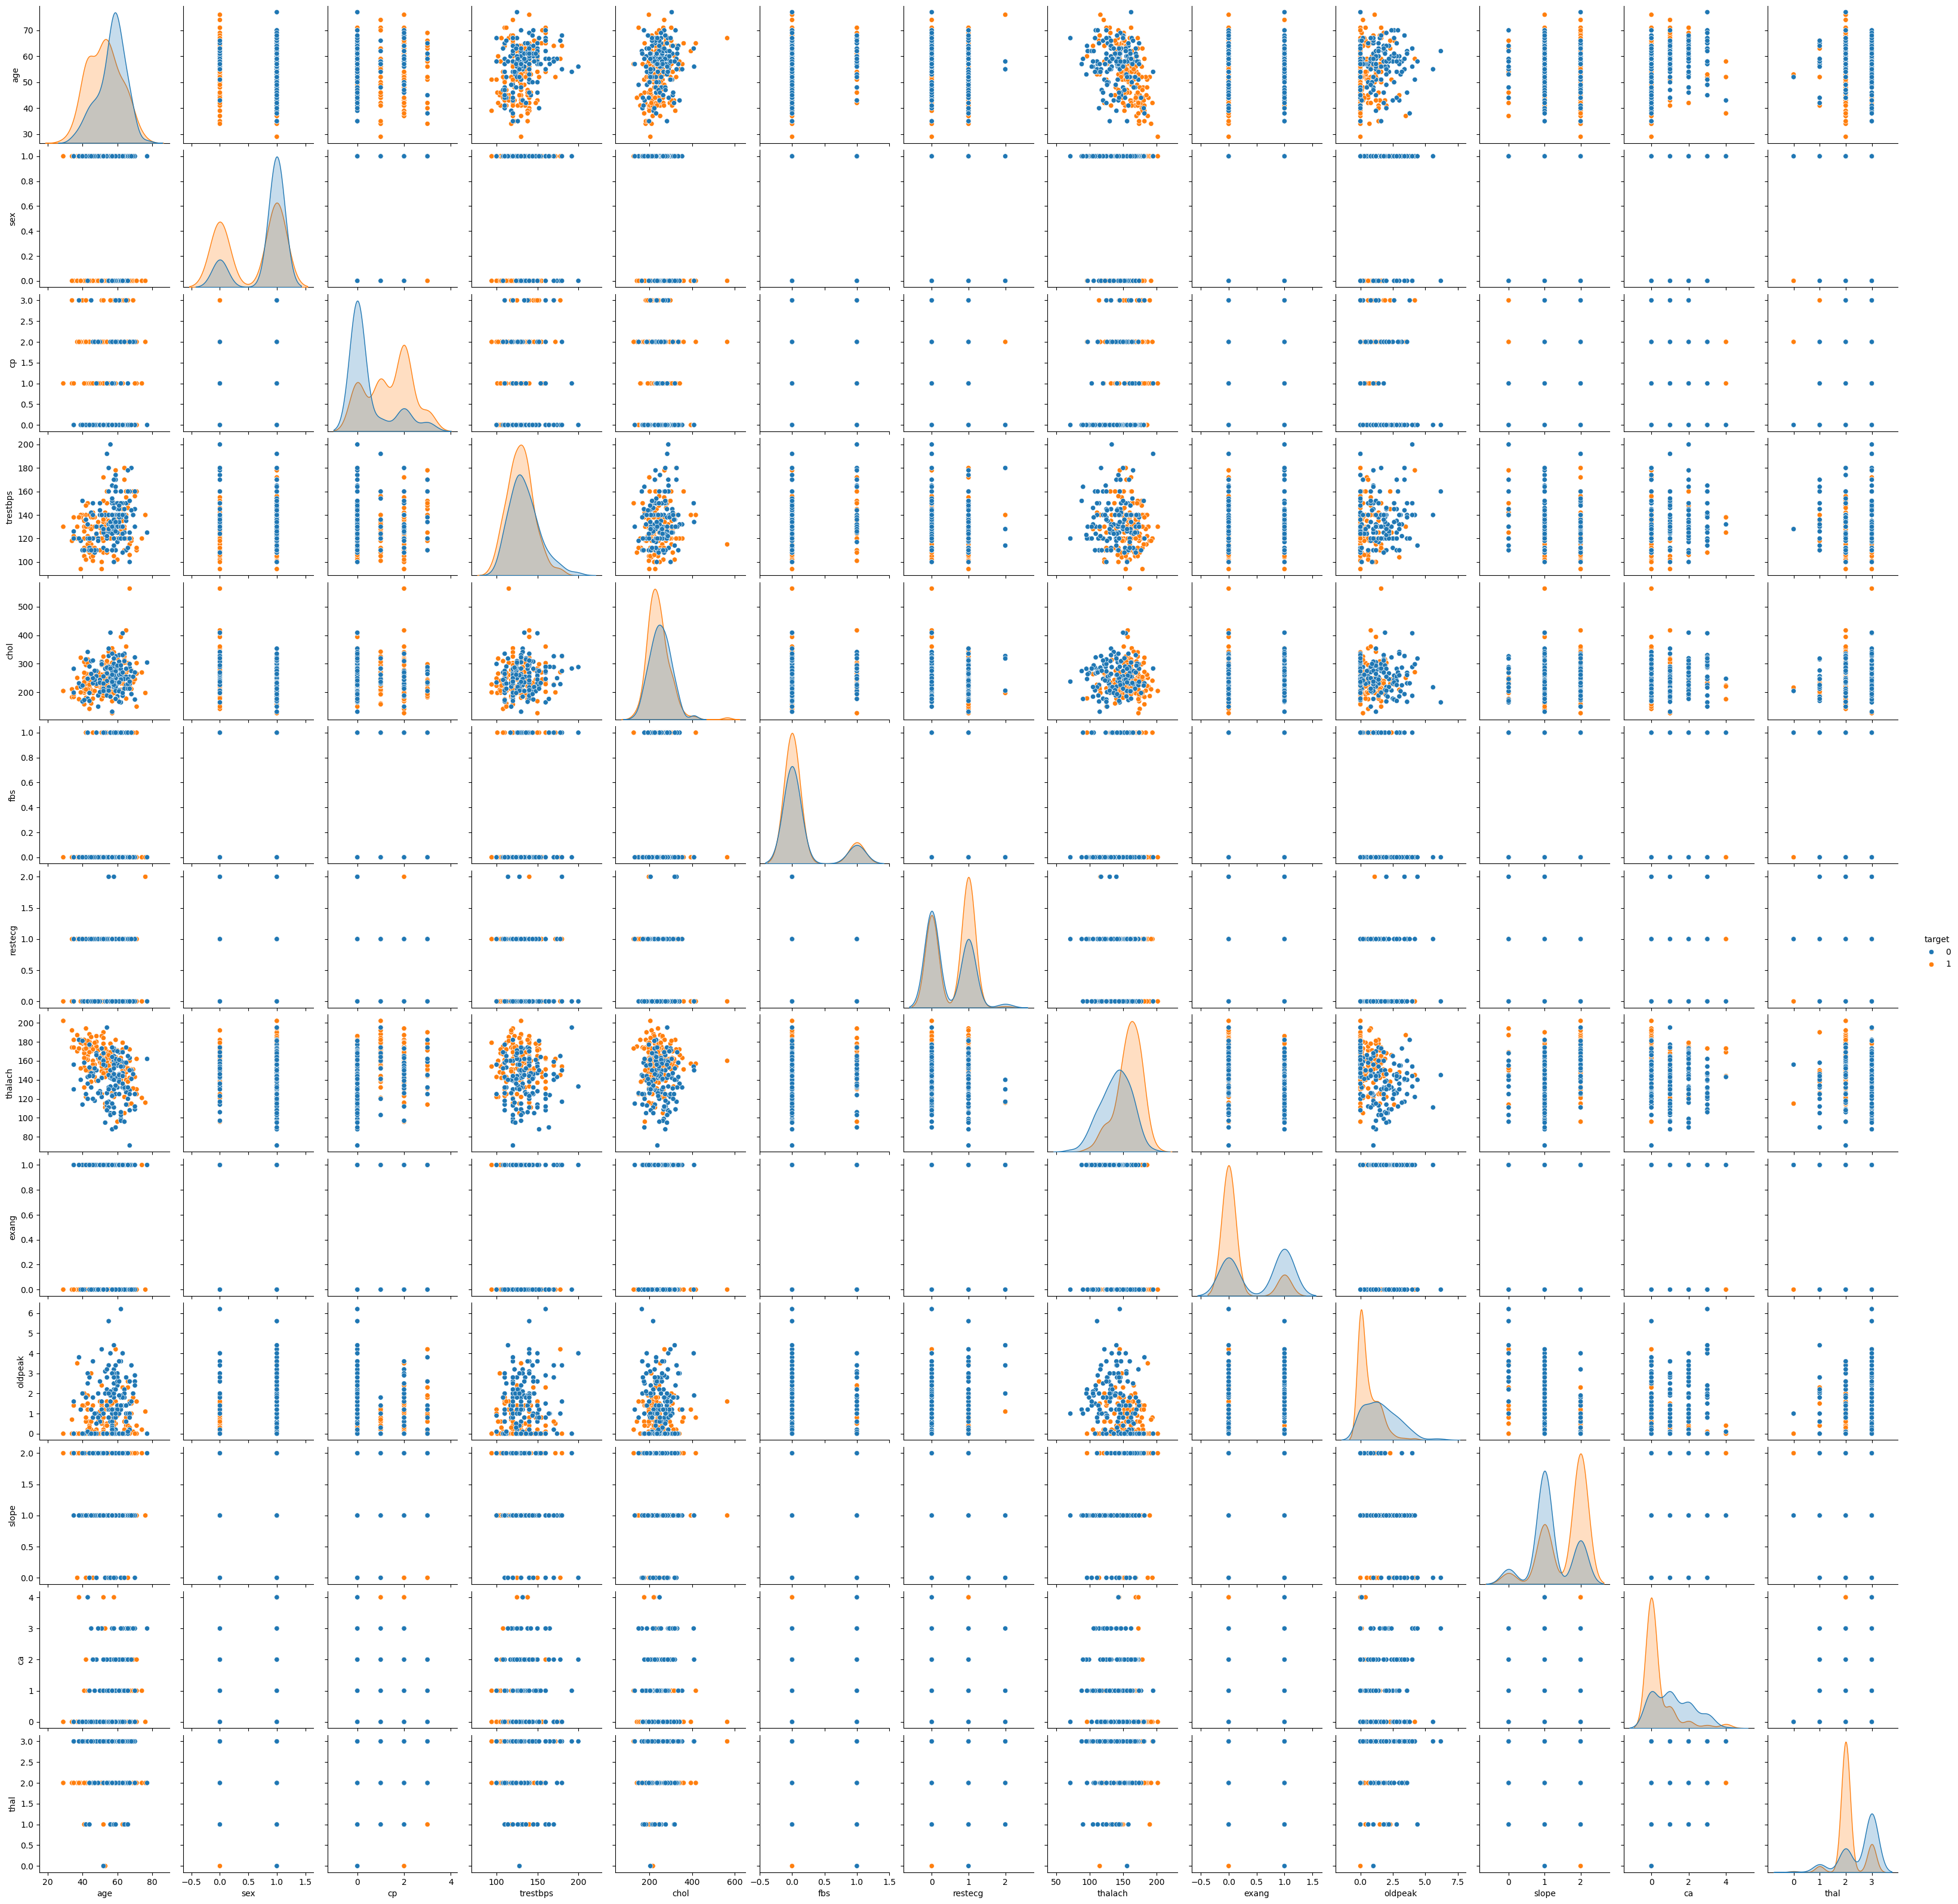

In [21]:
sns.pairplot(data = df,hue = 'target') # it takes time
plt.show()

# Step 4: Dividing Data Into Train and test 


###### Train test split

In [22]:
# 4.1 divide data into Target and features

X = df.iloc[:,:-1]
y = df['target']

In [23]:
X.shape , y.shape

((303, 13), (303,))

In [24]:
# 4.2 Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2,random_state = 42)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


# step 5: Multi Model Creation


In [26]:
# Because target value :only:0,1 (binary classification)
# This is not a regression problem,

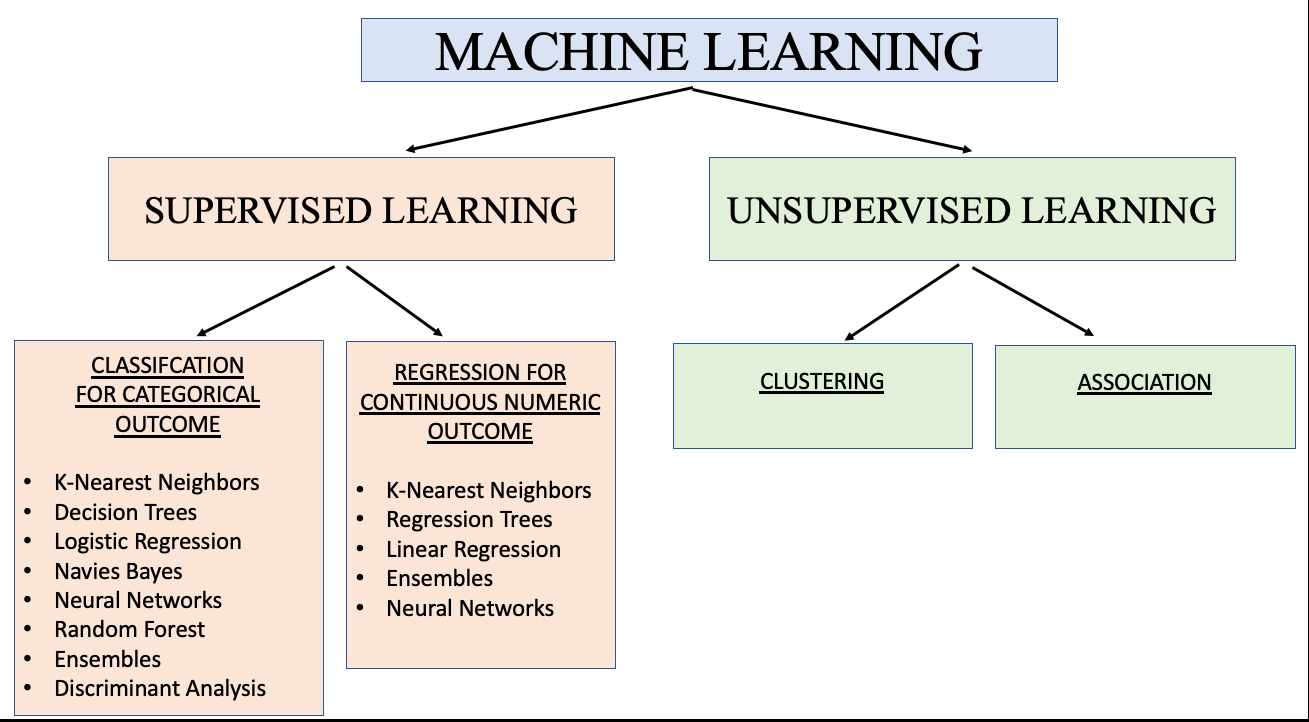

### Step 5.1: Logistic Regression Model

In [27]:
# it uses the concept of sigmoid function: Linear points converted to sigmoid point or S curve
# e(z)=1/1+e^(-z)
# z = y_pred
# y_pred = Linear Regression
# sigmoid function converted linear line to S curve
# y_pred = mx+c
# logistic regression

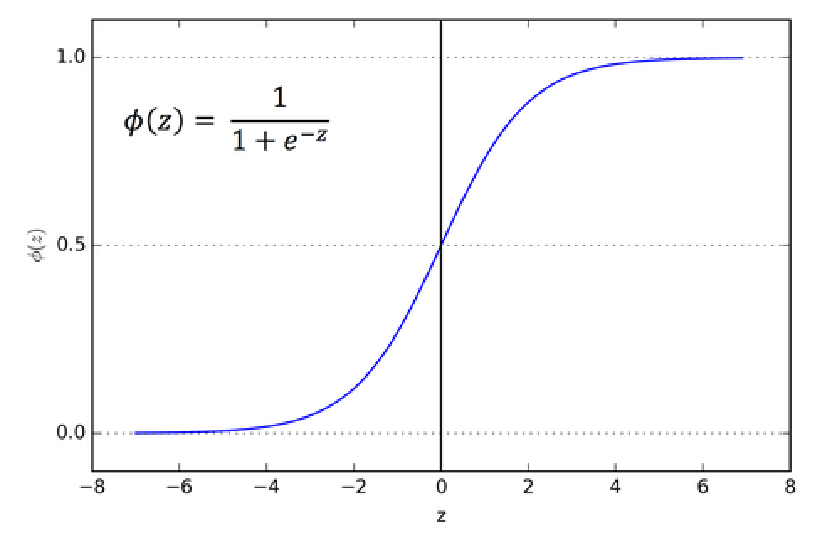

In [28]:
# Logistic Regression: we can solve Binary and Multiclass classification

In [29]:
# 5.1.1 Import Logistic Regression in sklearn linearmodel


In [30]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression() #model object
model_lr.fit(X_train,y_train)  #training

LogisticRegression()

In [31]:
# # x=cp bcoz cp is most corelated to target(3.12)
# sns.scatterplot(data=df, x ='cp', y ='target', hue = 'target')
# plt.show()

In [32]:
y_pred = model_lr.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [33]:
# 5.1.2: Import model evalution  metrices
# it will be called when problem is of classification

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [34]:
# 5.1.3 : import confusion  metrix to evaluate classification model

from sklearn.metrics import confusion_matrix

In [35]:
# error:comparison ; if score tie
# type 1 error : type 2 error; type 1 is danger

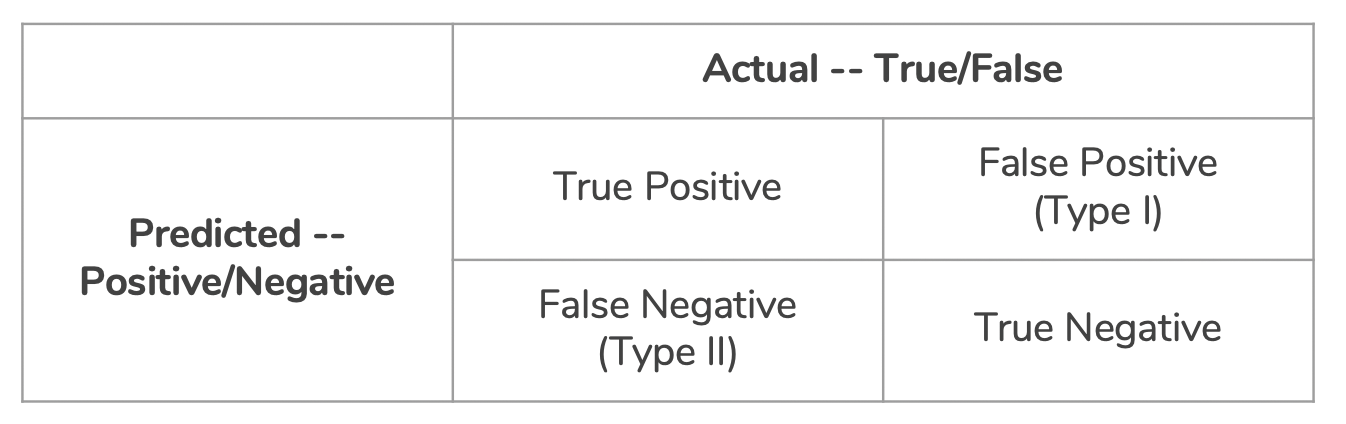

In [36]:
cm = confusion_matrix(y_test,y_pred)

In [37]:
print(cm)

[[25  4]
 [ 3 29]]


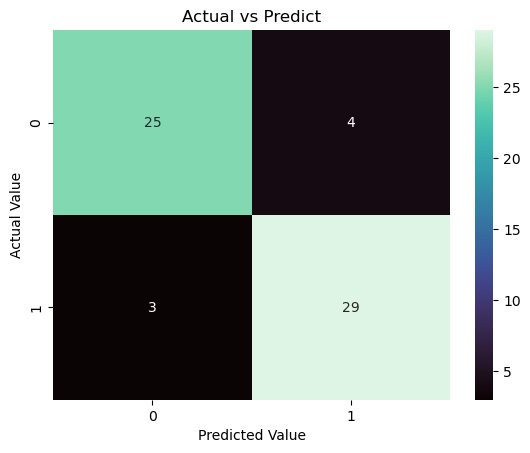

In [38]:
plt.title('Actual vs Predict')
sns.heatmap(cm,annot=True,cmap = 'mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

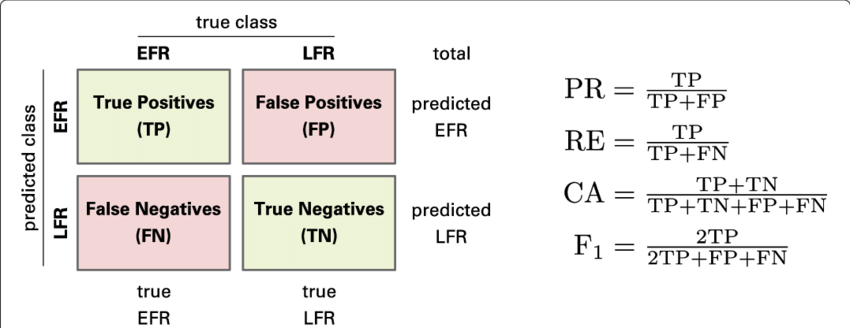

In [39]:
cm.ravel()

array([25,  4,  3, 29])

In [40]:
TN,FP,FN,TP = cm.ravel()

In [41]:
ps = precision_score(y_test, y_pred) # through method
print('Precision Score is:', ps)

# ps = TP/(TP+FP)
# ps
# # maually

Precision Score is: 0.8787878787878788


In [42]:
acs = accuracy_score(y_test, y_pred)
print('Accuracy Score is:', acs)

# acs = (TP+TN)/(TP+TN+FP+FN)
# acs

Accuracy Score is: 0.8852459016393442


In [43]:
rc = recall_score(y_test, y_pred)
print('Recall Score is:', rc)

# rc = TP/(TP+FN)
# rc

Recall Score is: 0.90625


In [44]:
#  f1 score called when the score is tie in precision and recall score
# f1_ = (2*TP)/((2*TP)+FP+FN)
# f1_
#  OR 
# f2_ = (2*ps*rc)/(ps+rc)
# f2_


f1_ = f1_score(y_test, y_pred)
print('F1 Score is:', f1_)



F1 Score is: 0.8923076923076924


In [45]:
print('Precision Score is:', ps)
print('Accuracy Score is:', acs)
print('Recall Score is:', rc)
print('F1 Score is:', f1_)


Precision Score is: 0.8787878787878788
Accuracy Score is: 0.8852459016393442
Recall Score is: 0.90625
F1 Score is: 0.8923076923076924


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [47]:
# 5.1.4: checking model score 
# model score same as accuarcy score
lr_score = model_lr.score(X_test,y_test)
lr_score

0.8852459016393442

### Step 5.2: Naive Bayes ML Model

In [48]:
# pre assumption: IT will be pre-assume NO correlation b/w Features
# it uses bayes theorm 

##### step5.2.1: import Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
# GaussianNB only be use in case of binary classification
# MultinomialNB : only be used in case of multi class classification


model_nv =  GaussianNB()
model_nv.fit(X_train, y_train) #train part/ learning

GaussianNB()

In [50]:
y_pred = model_nv.predict(X_test)


In [51]:
nv_score = model_nv.score(X_test,y_test)
print('Naive Bayes Score:',nv_score)

Naive Bayes Score: 0.8688524590163934


In [52]:
# we call this scores when the model is logistic regression not in Linear Regression

print('Precision Score is:', precision_score(y_test,y_pred) )
print('Accuracy Score is:', accuracy_score(y_test,y_pred))
print('Recall Score is:', recall_score(y_test,y_pred))
print('F1 Score is:', f1_score(y_test,y_pred))


Precision Score is: 0.9
Accuracy Score is: 0.8688524590163934
Recall Score is: 0.84375
F1 Score is: 0.8709677419354839


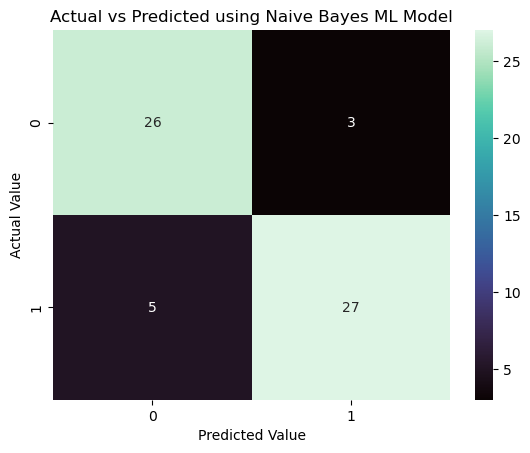

In [53]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted using Naive Bayes ML Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [54]:
# model1>Y_pred>scores>confusionmatrix>classification_report
# model2>Y_pred>scores>confusionmatrix>classification_report
# model3>Y_pred>scores>confusionmatrix>classification_report
# model4>Y_pred>scores>confusionmatrix>classification_report
# model5>Y_pred>scores>confusionmatrix>classification_report
# model6>Y_pred>scores>confusionmatrix>classification_report

# best model: save : error (low), accuracy score high
# deploy

### Step5.3: Support Vector Machine ML Model

In [55]:
# nearest data points are called vectors
# nearest lines are support vector and they form a centre line called plane
# 2D/3d/4d
# SVM Works on Support vectos of nearest data points of different classes
# It will create line, plane or Hyperplane
# we can use this for both regression problems and classification(Binary/Multiclass)

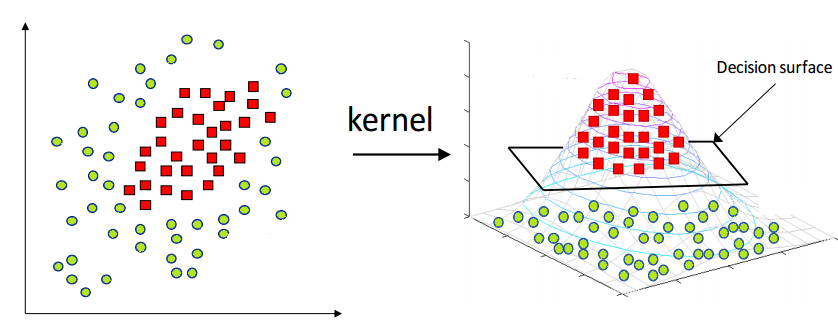

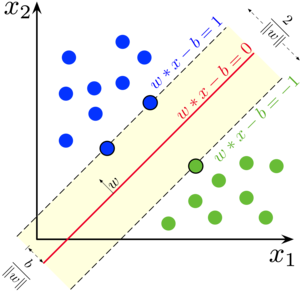

##### Step5.3.1: import Svm module

In [56]:
from sklearn.svm import SVC

model_svc =  SVC()

model_svc.fit(X_train,y_train)

SVC()

##### Step 5.3.2: Prediction X_test

In [57]:
y_pred  = model_svc.predict(X_test)

##### Step5.3.3: checking scores and Prediction matrix

In [58]:
print('Precision Score is:', precision_score(y_test,y_pred) )
print('Accuracy Score is:', accuracy_score(y_test,y_pred))
print('Recall Score is:', recall_score(y_test,y_pred))
print('F1 Score is:', f1_score(y_test,y_pred))


Precision Score is: 0.6666666666666666
Accuracy Score is: 0.7049180327868853
Recall Score is: 0.875
F1 Score is: 0.7567567567567568


In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



##### Step 5.3.4: Confusion Matrix

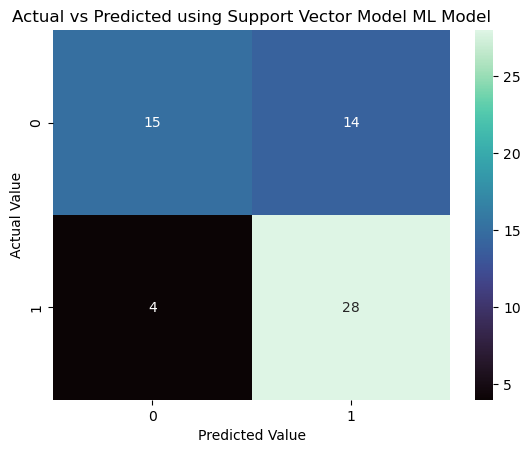

In [60]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted using Support Vector Model ML Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [61]:
# In svc the error rate is high so this model is not good in comparison of Logistic and NAive  
# 4 is the type 1 error : actual disease but ml predicts everything is well
# .score(it return automatically) is equal to accuracy score(we have to tell to give return).. 

In [62]:
svm_score = model_svc.score(X_test,y_test)
print('SVM Score:',svm_score)

SVM Score: 0.7049180327868853


In [63]:
lr_score, nv_score, svm_score

(0.8852459016393442, 0.8688524590163934, 0.7049180327868853)

# Step 5.4: Decision Tree ML Model

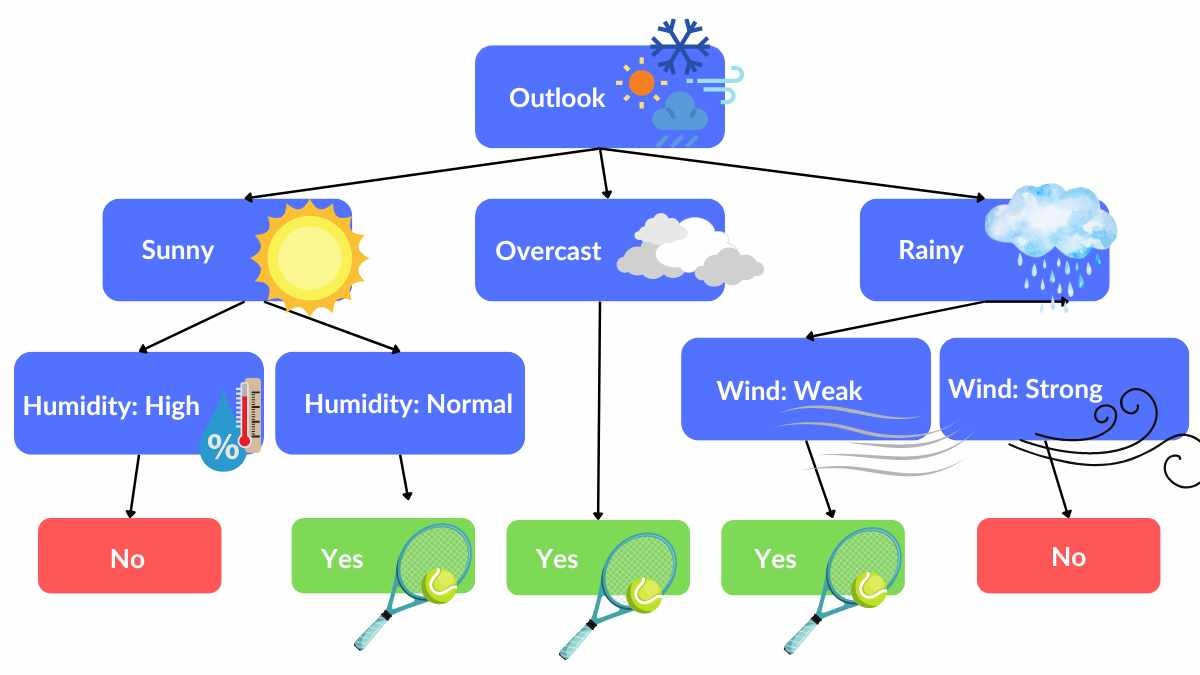

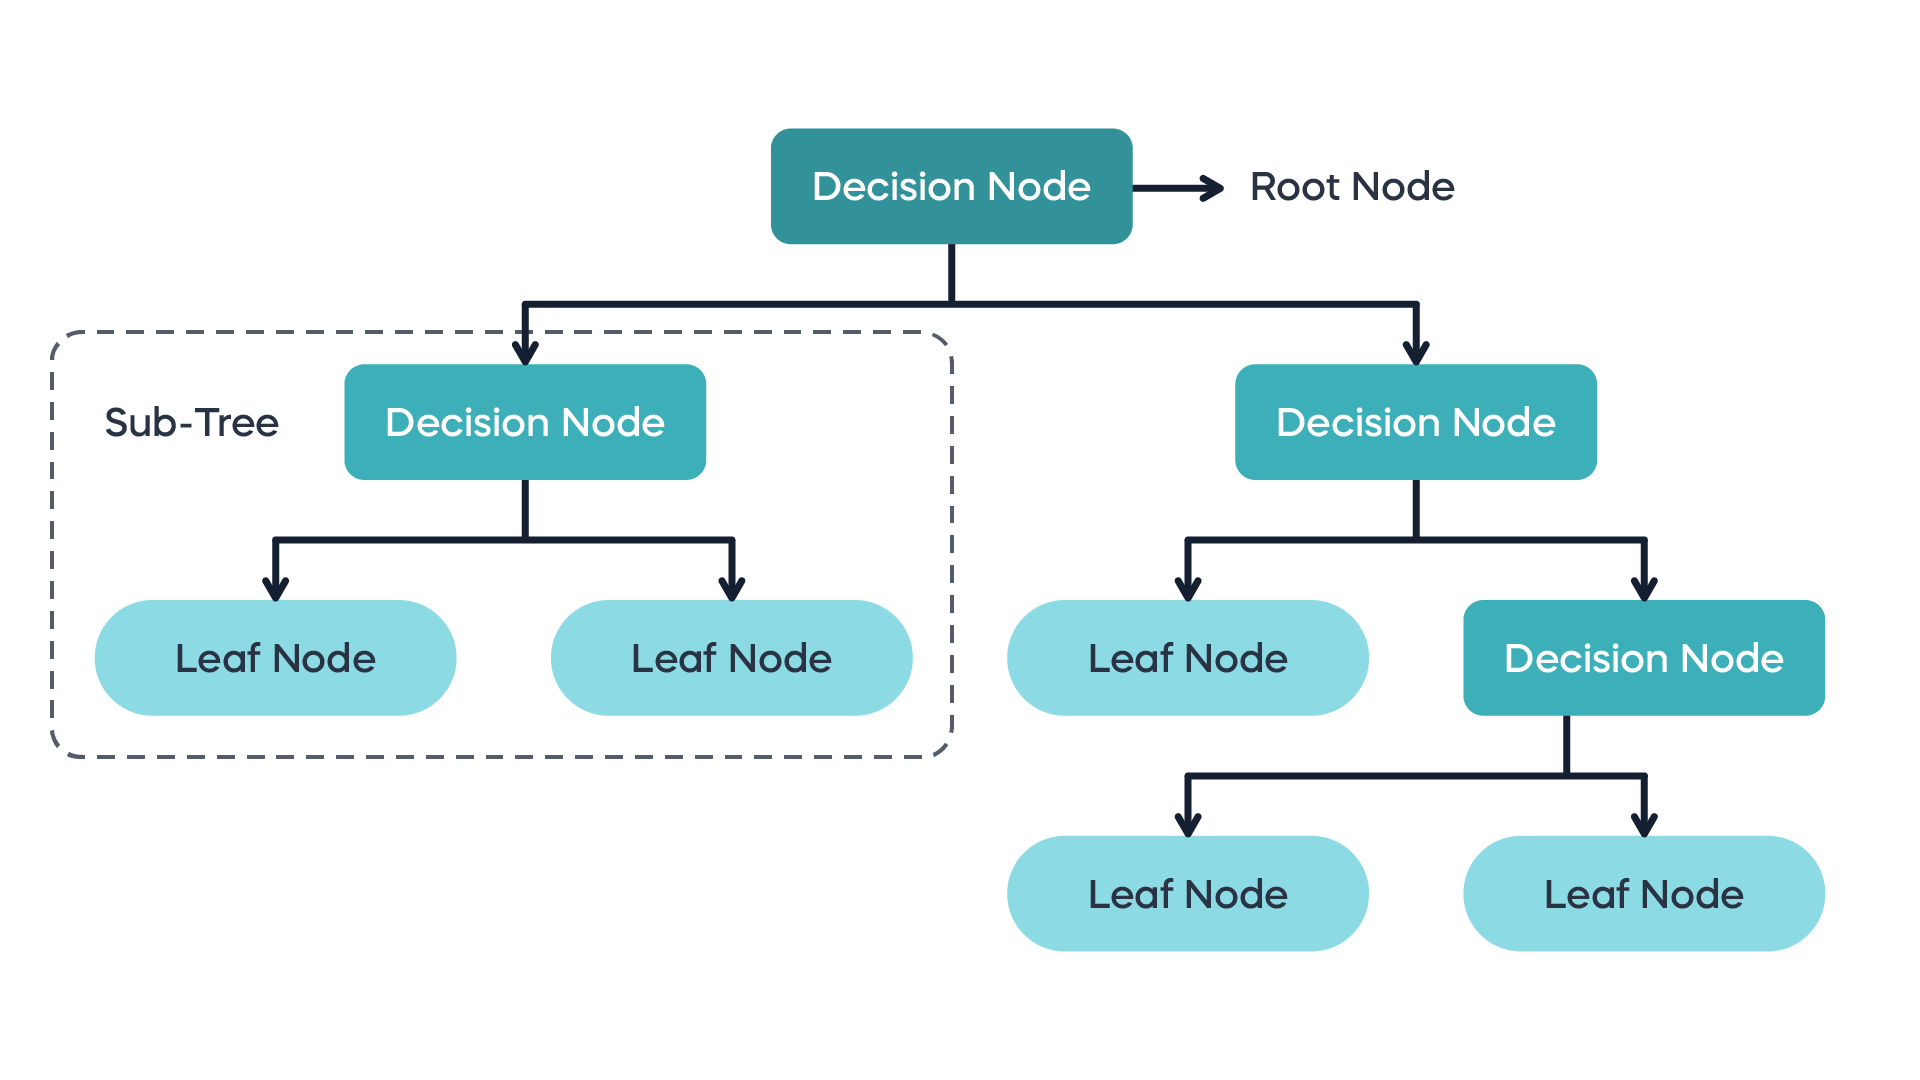

In [64]:
# flower features : Sepal length, Sepal width, Petal length , Petal width 
# 3 diff.  species: Iris versicolor,  Iris Setosa , Iris Verginica

# Decision Tree:   
# it uses Gini criteria

##### Step 5.4.1 : Import Decision Tree Model

In [65]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()

model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

##### Step 5.4.2: Predict

In [66]:
y_pred = model_dt.predict(X_test)

#####  step 5.4.3 : checking scores

In [67]:
print('Precision Score is:', precision_score(y_test,y_pred) )
print('Accuracy Score is:', accuracy_score(y_test,y_pred))
print('Recall Score is:', recall_score(y_test,y_pred))
print('F1 Score is:', f1_score(y_test,y_pred))


Precision Score is: 0.8888888888888888
Accuracy Score is: 0.819672131147541
Recall Score is: 0.75
F1 Score is: 0.8135593220338984


In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



##### Step 5.4.4: Plot Tree

In [69]:
from sklearn.tree import plot_tree

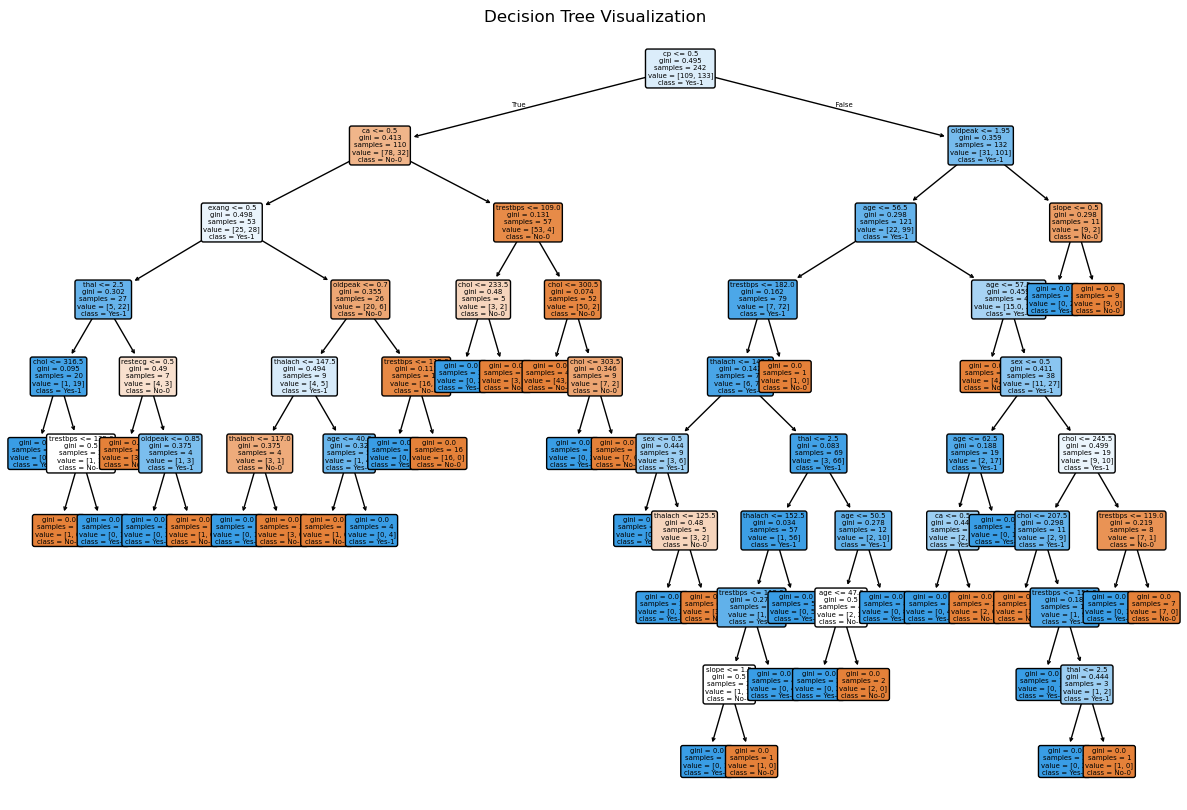

In [70]:
# this tree's main correlation is cp(chest pain) bcoz in earlier we find cp is correlate to target

plt.figure(figsize=(15, 10)) # Adjust figure size for better readability
plot_tree(model_dt,
          feature_names=X.columns,
          class_names=['No-0','Yes-1'],
          filled=True, # Color nodes based on class
          rounded=True, # Round node corners
          fontsize=5) # Adjust font size

plt.title("Decision Tree Visualization")
plt.show() # Display the plot

In [71]:
dt_score = model_dt.score(X_test,y_test)
print('Decision Tree Score:',dt_score)

Decision Tree Score: 0.819672131147541


# Step 5.5: Ensemble ML Model
* **Bagging technique:** Bags of Multiple ML Model, and each model give it's prediction/classification, final outcome based on majority.
* **Boosting technique:** Next model learn from previous model and boost it minimize error to improve score.

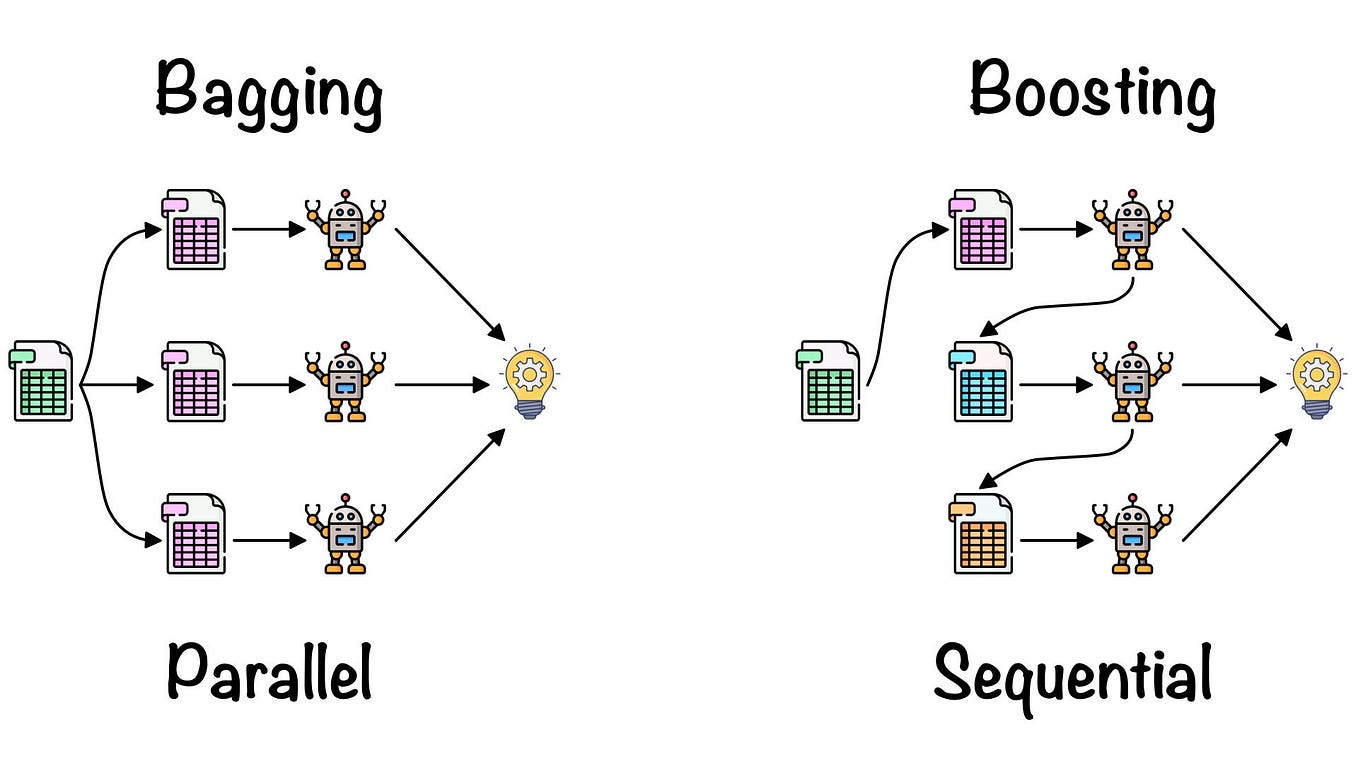

In [72]:
# 1.Bagging technique
# it makes 1 overall model having multiple parameters (multiple sub models with different parameters)


## Step 5.5.1: Bagging Technique Model >> Random Forest ML Model

In [73]:
# derived from Decision Tree.
# Random forest: Bags of Multiple Decision Trees() 
# default Trees : 100
# random forest is the part of ensemble model's Bagging technique
# if random forest has regression problem : avg of final value 
# RAndom Forest classification > BInary/Multiclass classification>> majority voting

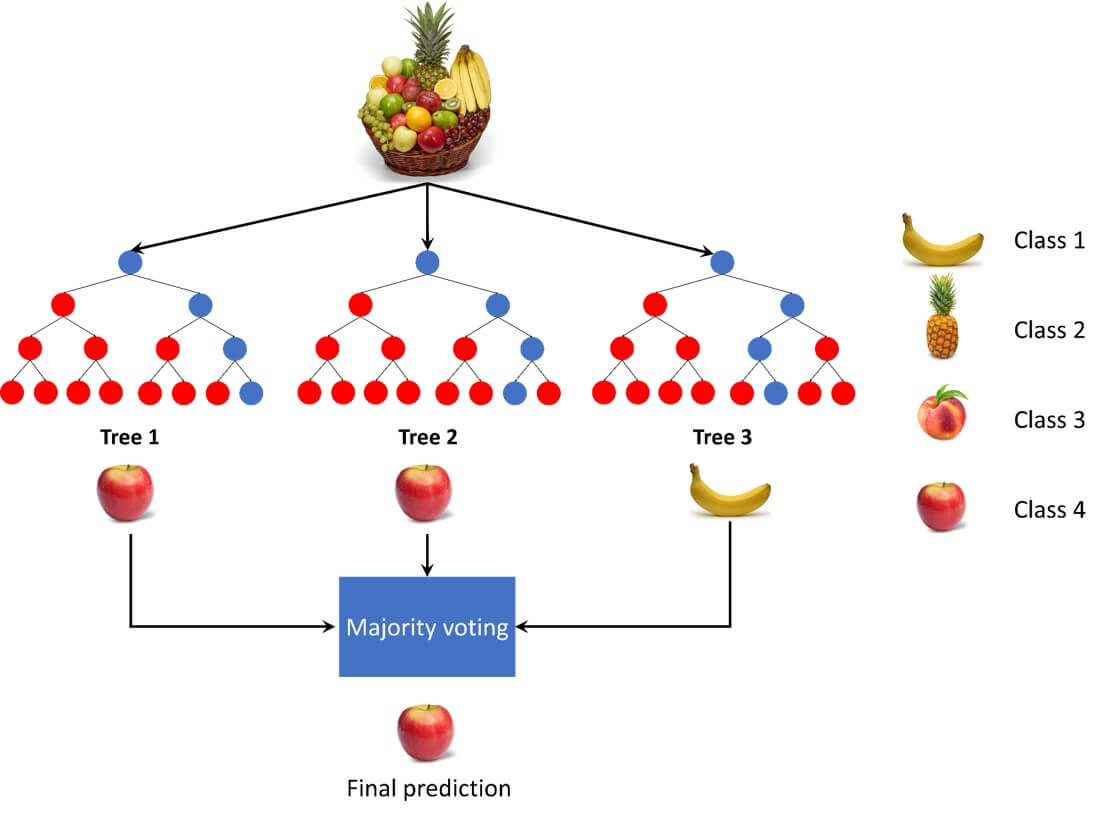

##### 5.5.1.2: Import Random Forest Model

In [74]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators= 200) # Parameter change: default tree 100 to 200

model_rf.fit(X_train,y_train) #learning 

RandomForestClassifier(n_estimators=200)

##### 5.5.1.3: Prediction based on X_test

In [75]:
y_pred = model_rf.predict(X_test)

##### 5.5.1.4: Checking scores


In [76]:
print('Precision Score is:', precision_score(y_test,y_pred) )
print('Accuracy Score is:', accuracy_score(y_test,y_pred))
print('Recall Score is:', recall_score(y_test,y_pred))
print('F1 Score is:', f1_score(y_test,y_pred))

Precision Score is: 0.8484848484848485
Accuracy Score is: 0.8524590163934426
Recall Score is: 0.875
F1 Score is: 0.8615384615384616


In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [78]:
rf_score = model_rf.score(X_test,y_test)
print('RF Score:',rf_score)

RF Score: 0.8524590163934426


##### 5.5.1.5: Confusion Matrix

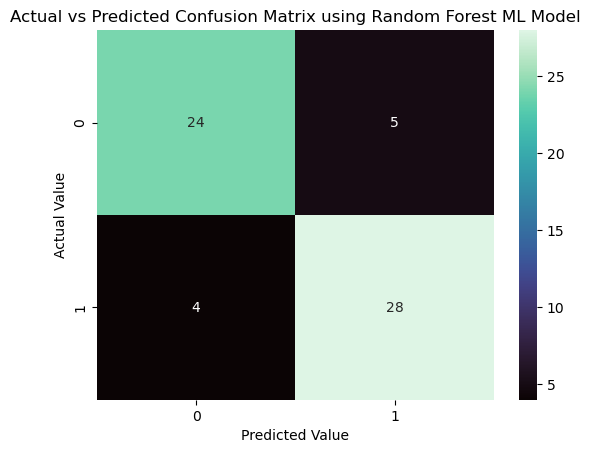

In [79]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted Confusion Matrix using Random Forest ML Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [80]:
# save the accuracy score using random seed or random state (we have to identify it ) and then save the score 

## Step 5.6: ***Boosting Technique:*** Adaboost, Gradientboost, XGboost

In [81]:
# Adaboost: Adaptive Boosting
# Gradient: GBM (step by step)
# LBM: Gradient boost: LGBM
# XGBoost : Extreme Gradient Boosting: eroor minimize at xtreame level(rata baazi): overfit
# CAtboost: Categorial data: textual data

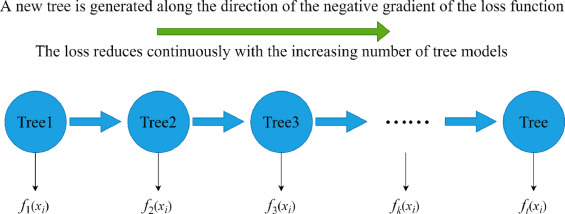

##### 5.6.1: import XGboost ML Algo

In [82]:
# pip install xgboost

In [83]:
import xgboost
print('Done')

Done


In [84]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()

model_xgb.fit(X_train,y_train) #none: no hyper parameter : to model fine tune

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

##### 5.6.2: pred

In [85]:
y_pred = model_xgb.predict(X_test)

##### 5.6.3: Checking scores

In [86]:
xgb_score = model_xgb.score(X_test,y_test)
print('XGB Score:',xgb_score)

XGB Score: 0.819672131147541


In [87]:
xgb_score = accuracy_score(y_test,y_pred)
xgb_score

0.819672131147541

# Step 5.7: KNN (K nearest neighbors): Regression, classification

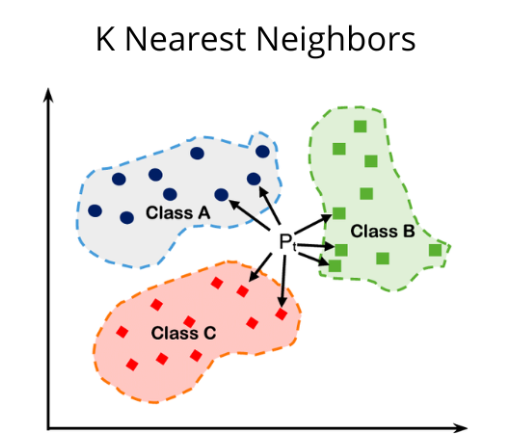

##### 5.7.1 : Import KNN

In [88]:
# we change the value(14) manually but it will be changed by whilw mthod

from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=14)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

##### 5.7.2: Predict

In [89]:
y_pred = model_knn.predict(X_test)

##### 5.7.3: Checking score and classification report

In [90]:
knn_score = accuracy_score(y_test,y_pred)
knn_score

0.7377049180327869

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        29
           1       0.77      0.72      0.74        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



##### 5.7.4: confusion Matrix

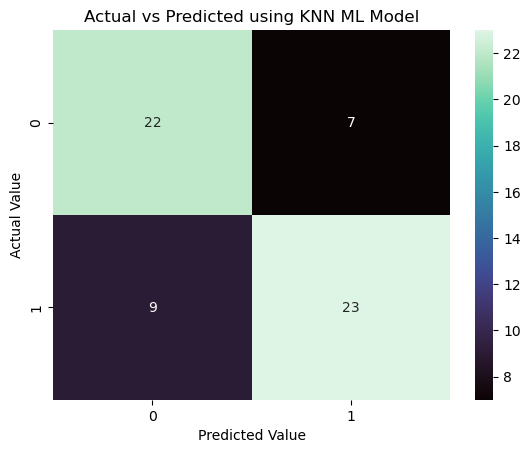

In [92]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted using KNN ML Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

# Step 5.8: Artificial Neural Network using Deep Learning

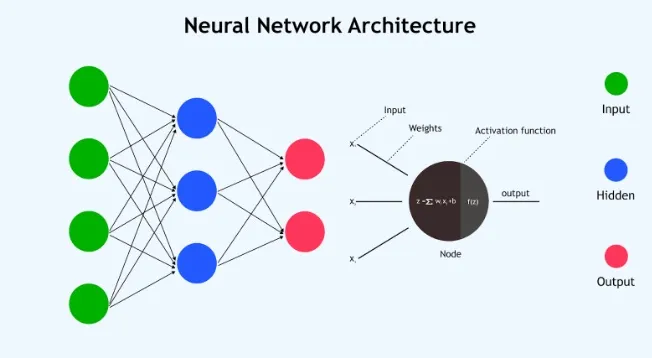

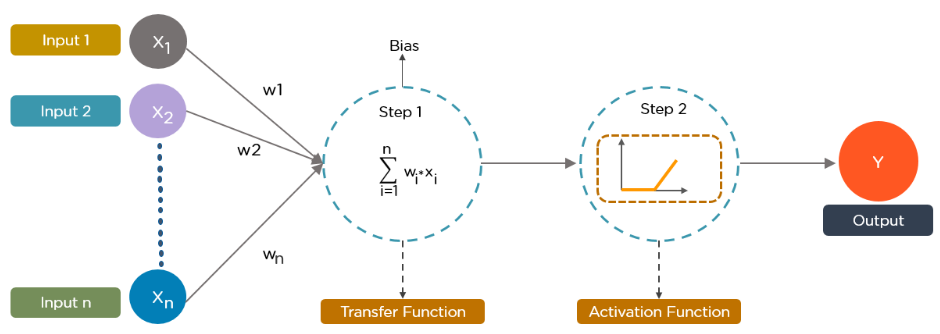

In [93]:
# ML works on limited data 
# if input changes ML model fail
# we get the soln from deep learning
# Deep Learning : dense (deep) Neural Network : trained on multiple possibilities
# advanced function of ml: dl 

In [94]:
# keras tensor flow: module we used in ANN
# tensors: array


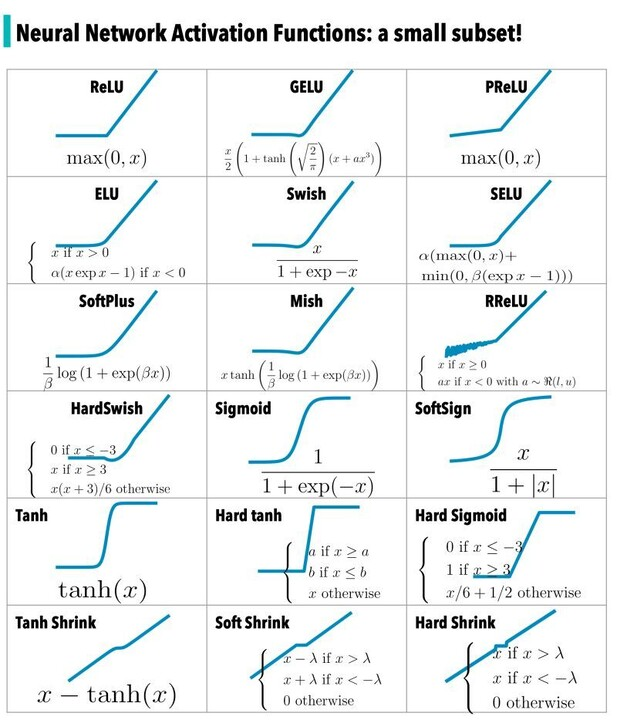

### 5.8.1: ANN Model Creation

In [95]:
# pip install keras

In [96]:
# pip install tensorflow

In [97]:
from keras.models import Sequential
from keras.layers import Dense
print('Done')

Done


In [98]:
#5.8.2 model building
model = Sequential()  # Step 1 Sequential model creation
model.add(Dense(11,activation='relu',input_dim=13)) # Dense Layer
model.add(Dense(1,activation='sigmoid')) # Output will be 1 Neuron for Binary

model.compile(loss='binary_crossentropy',  # loss to calculate model loss
              optimizer='adam', #optimizer to optimize model learning
              metrics=['accuracy'])  #  metrics return accuracy score

print('Done')

Done


In [99]:
# 5.8.3:  Model Training

model.fit(X_train,y_train,epochs=300) #iteration during retraining : epochs=300

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4504 - loss: 54.9313
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4504 - loss: 49.3629 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4504 - loss: 43.3690
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4504 - loss: 37.3937 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4504 - loss: 30.5724 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4504 - loss: 23.7404 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4504 - loss: 16.4229 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4504 - loss: 9.0469 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5124 - loss: 2.7196 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6033 - loss: 2.6240
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5950 - loss: 2.6539
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accurac

In [100]:
# 5.8.4: pred y_pred

y_pred = model.predict(X_test)
y_pred = [round(i[0])for i in y_pred ]
print(y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]


In [101]:
ann_score= accuracy_score(y_test,y_pred)
ann_score

0.8688524590163934

# step 6 : All Model Comparison

In [102]:
all_model_score = [lr_score,
                  nv_score,
                   svm_score,
                  dt_score,
                  rf_score,
                  xgb_score,
                  knn_score,
                  ann_score]
model_name = ['Logistic','Naive','SVM','Decision tree','Random forest','XGB','KNN','ANN']
print('DONe')

DONe


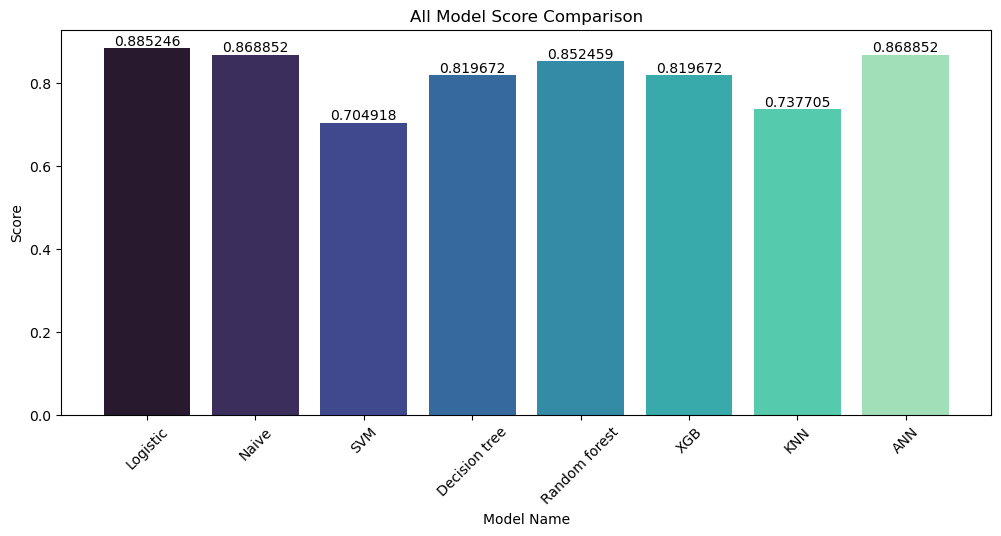

In [103]:
plt.figure(figsize=(12,5))
plt.title('All Model Score Comparison')
ax = plt.bar(x = model_name, height= all_model_score,color = sns.color_palette('mako',8))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.show()

In [104]:
# lr and ann is equal : prefer Lr

# step 7 : Best Model Save

In [105]:
import pickle
with open('heart_disease_pred.pkl','wb') as f:
    pickle.dump(model_lr,f)
print('Done')

Done


In [106]:
# get code working directory
os.getcwd()


'C:\\Users\\Inder\\Documents +data science\\heart_disease_prediction'

In [107]:
# 1 jupiter notebook
# 2 new file with .py extension
# 3 terminal = cd.. to delete 